In [3]:
# 22K-8732
# Class Tasks Lab-3

# Applying all the filters (Linear & Non Linear) discussed in the class.

Saving Human_Image_for_LAB3.jpg to Human_Image_for_LAB3 (1).jpg


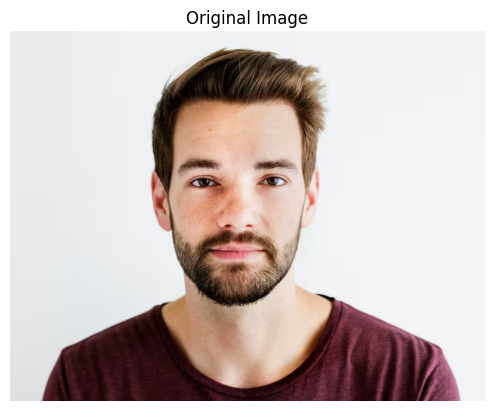

In [4]:
# Upload Image from PC

from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

**Applying Linear Filters**

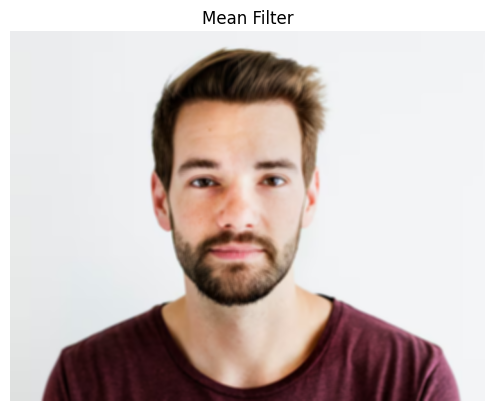

In [5]:
# Mean Filter
mean_filtered = cv2.blur(image, (5, 5))
plt.imshow(mean_filtered)
plt.title("Mean Filter")
plt.axis("off")
plt.show()


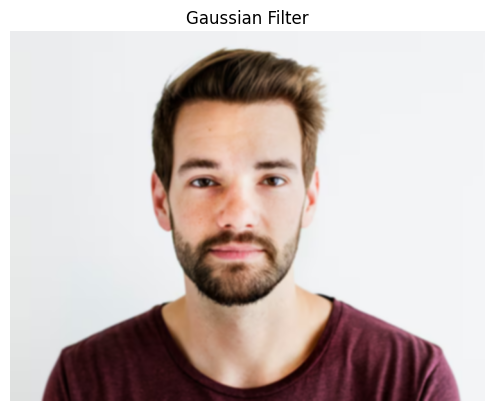

In [6]:
# Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 1.5)
plt.imshow(gaussian_filtered)
plt.title("Gaussian Filter")
plt.axis("off")
plt.show()


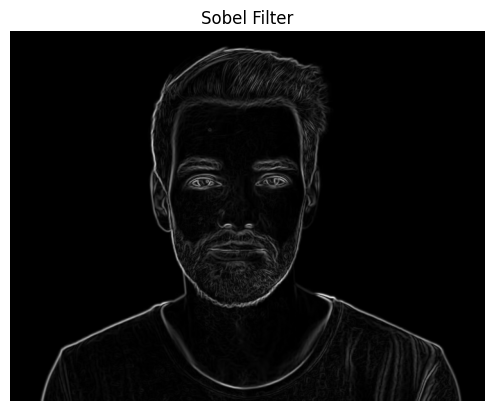

In [7]:
# Sobel Filter
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel Filter")
plt.axis("off")
plt.show()

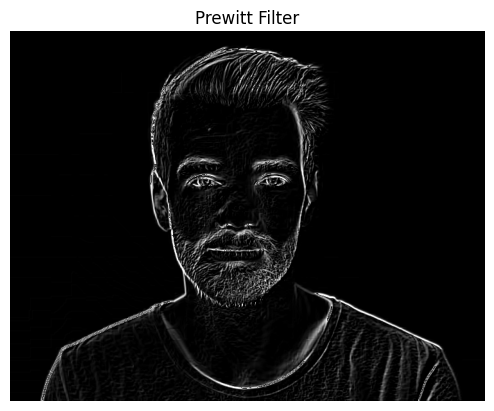

In [8]:
# Prewitt Filter
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray, -1, kernelx)
prewitt_y = cv2.filter2D(gray, -1, kernely)
prewitt = prewitt_x + prewitt_y
plt.imshow(prewitt, cmap='gray')
plt.title("Prewitt Filter")
plt.axis("off")
plt.show()

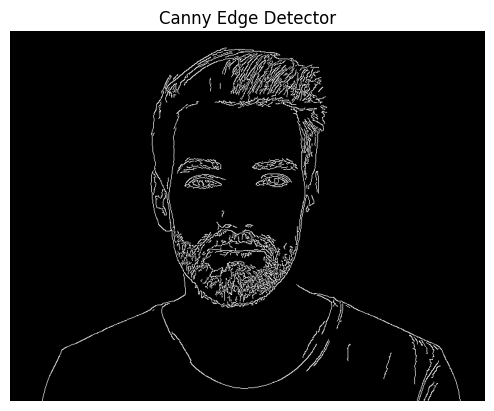

In [9]:
# Canny Edge Detector
canny = cv2.Canny(gray, 100, 200)
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detector")
plt.axis("off")
plt.show()

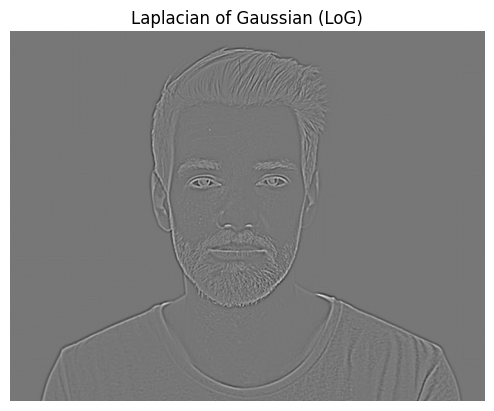

In [10]:
# Laplacian of Gaussian (LoG)
gaussian = cv2.GaussianBlur(gray, (5, 5), 0)
log = cv2.Laplacian(gaussian, cv2.CV_64F)
plt.imshow(log, cmap='gray')
plt.title("Laplacian of Gaussian (LoG)")
plt.axis("off")
plt.show()

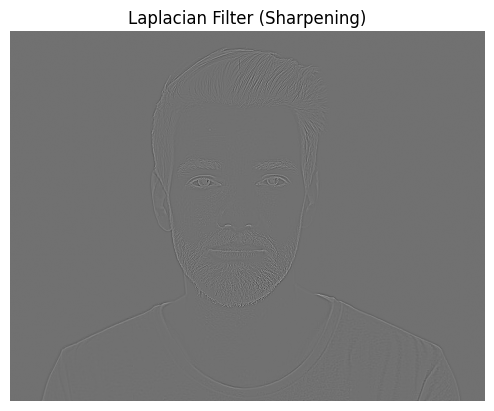

In [11]:
# Laplacian Filter (Sharpening)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Filter (Sharpening)")
plt.axis("off")
plt.show()

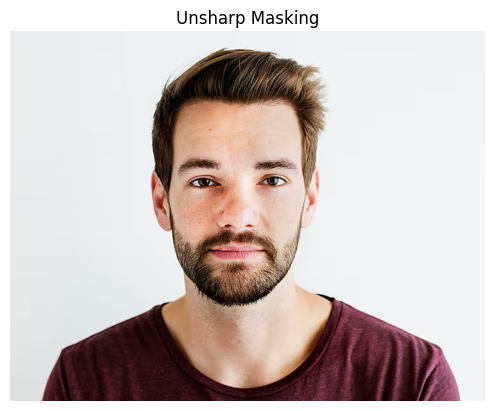

In [12]:
# Unsharp Masking
blurred = cv2.GaussianBlur(image, (5, 5), 0)
unsharp = cv2.addWeighted(image, 2, blurred, -1, 0)
plt.imshow(unsharp)
plt.title("Unsharp Masking")
plt.axis("off")
plt.show()

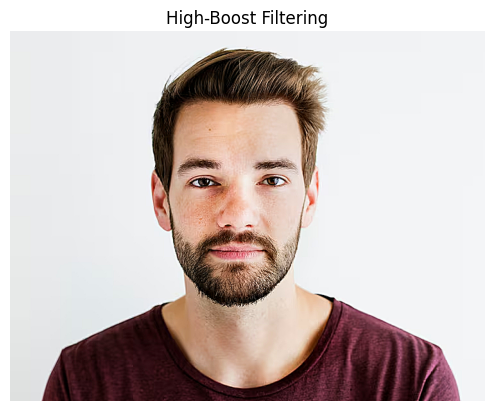

In [13]:
# High-Boost Filtering
A = 2
high_boost = cv2.addWeighted(image, A+1, blurred, -A, 0)
plt.imshow(high_boost)
plt.title("High-Boost Filtering")
plt.axis("off")
plt.show()

**Applying Non-Linear Filters**

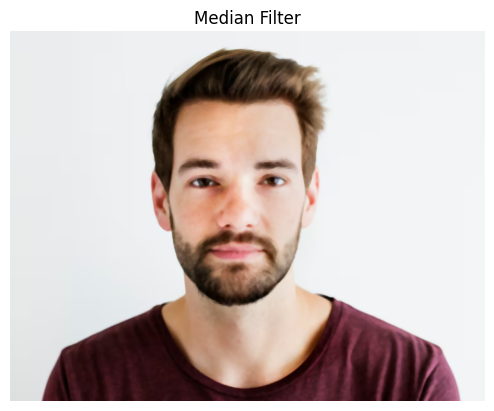

In [14]:
# Median Filter
median = cv2.medianBlur(image, 5)
plt.imshow(median)
plt.title("Median Filter")
plt.axis("off")
plt.show()

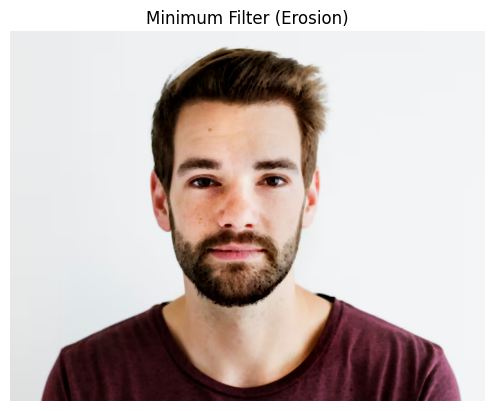

In [15]:
# Minimum Filter (Erosion)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
min_filter = cv2.erode(image, kernel)
plt.imshow(min_filter)
plt.title("Minimum Filter (Erosion)")
plt.axis("off")
plt.show()

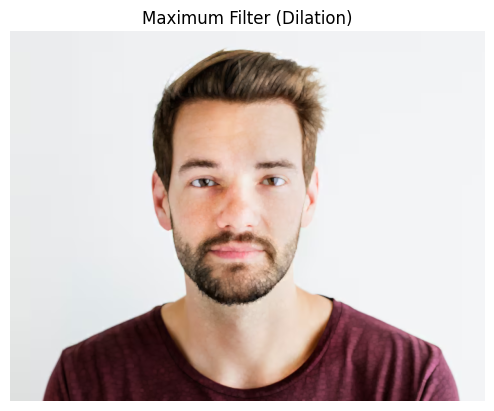

In [16]:
# Maximum Filter (Dilation)
max_filter = cv2.dilate(image, kernel)
plt.imshow(max_filter)
plt.title("Maximum Filter (Dilation)")
plt.axis("off")
plt.show()

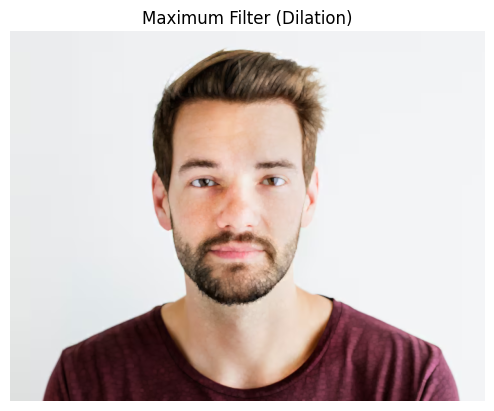

In [17]:
# Maximum Filter (Dilation)
max_filter = cv2.dilate(image, kernel)
plt.imshow(max_filter)
plt.title("Maximum Filter (Dilation)")
plt.axis("off")
plt.show()

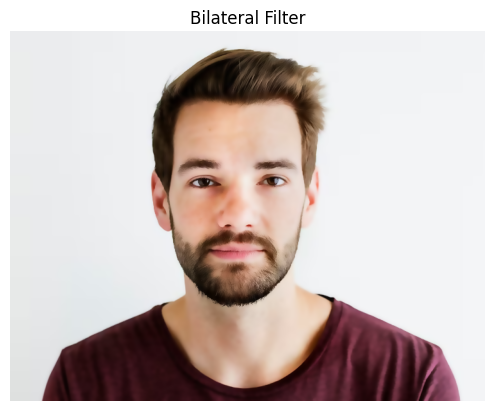

In [18]:
# Bilateral Filter
bilateral = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
plt.imshow(bilateral)
plt.title("Bilateral Filter")
plt.axis("off")
plt.show()

/tmp/ipython-input-3697263478.py:14: RuntimeWarning: overflow encountered in scalar subtract
  B1, B2 = z_xy - z_min, z_xy - z_max


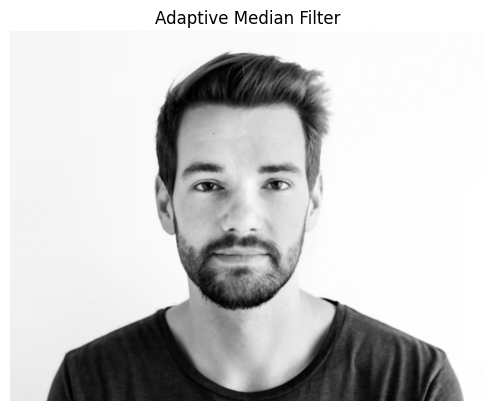

In [19]:
# Adaptive Median Filter (Custom Implementation)
def adaptive_median_filter(img, max_kernel_size=7):
    padded = cv2.copyMakeBorder(img, max_kernel_size, max_kernel_size, max_kernel_size, max_kernel_size, cv2.BORDER_REFLECT)
    output = np.zeros_like(img)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            k = 3
            while k <= max_kernel_size:
                region = padded[y:y+k, x:x+k]
                z_min, z_max, z_med = np.min(region), np.max(region), np.median(region)
                z_xy = img[y, x]
                A1, A2 = z_med - z_min, z_med - z_max
                if A1 > 0 and A2 < 0:
                    B1, B2 = z_xy - z_min, z_xy - z_max
                    if B1 > 0 and B2 < 0:
                        output[y, x] = z_xy
                    else:
                        output[y, x] = z_med
                    break
                else:
                    k += 2
            if k > max_kernel_size:
                output[y, x] = z_med
    return output

gray_adaptive = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
adaptive_median = adaptive_median_filter(gray_adaptive)
plt.imshow(adaptive_median, cmap='gray')
plt.title("Adaptive Median Filter")
plt.axis("off")
plt.show()
